## Data Exploration

### Encoding in python

In [64]:
import pandas as pd
import numpy as np

In [65]:
# pd.read_csv('companies.txt',sep='\t',encoding='ISO-8859-1').to_csv('companies.csv',index=False)

In [66]:
tips = pd.read_csv("tips_data.csv")

In [68]:
# Chardet: The Universal Character Encoding Detector (ASCII, UTF-8, UTF-16, UTF-32,Big5, GB2312, EUC-TW, HZ-GB-2312 etc)
import chardet

In [69]:
with open("tips_data.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(2000))

# check what the character encoding might be
print(result)

{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


So chardet is 100%  confidence that the right encoding is "UTF-16". Let's see if that's correct:

In [70]:
# read in the file with the encoding detected by chardet
tips = pd.read_csv("tips_data.csv", encoding='UTF-16')

### Data Cleaning

In [71]:
tips.head()

,Order_id,total_bill,tip,gender,smoker,day,time,size
0,ORD_1,16.99,1.01,Female,No,Sun,Dinner,2
1,ORD_2,10.34,1.66,Male,No,sun,Dinner,3
2,ORD_3,NaN,3.50,Male,No,Sun,Dinner,3
3,ORD_4,23.68,3.31,Male,No,Sun,Dinner,2
4,ORD_5,24.59,3.61,Female,No,Sun,Dinner,4


In [73]:
tips.tail()

,Order_id,total_bill,tip,gender,smoker,day,time,size
239,ORD_240,29.03,5.92,Male,No,Sat,Dinner,3
240,ORD_241,27.18,2.00,Female,Yes,Sat,Dinner,2
241,ORD_242,22.67,2.00,Male,Yes,Sat,Dinner,2
242,ORD_243,17.82,1.75,Male,No,Sat,Dinner,2
243,ORD_244,18.78,3.00,Female,No,Thur,Dinner,2


In [74]:
tips.sample(10)

,Order_id,total_bill,tip,gender,smoker,day,time,size
177,ORD_178,14.48,2.00,Male,Yes,Sun,Dinner,2
31,ORD_32,18.35,2.50,Male,No,Sat,Dinner,4
22,ORD_23,15.77,2.23,Female,No,Sat,Dinner,2
159,ORD_160,16.49,2.00,Male,No,Sun,Dinner,4
119,ORD_120,24.08,2.92,Female,No,Thur,Lunch,4
196,ORD_197,10.34,2.00,Male,Yes,Thur,Lunch,2
46,ORD_47,22.23,5.00,Male,No,Sun,Dinner,2
173,ORD_174,31.85,3.18,Male,Yes,Sun,Dinner,2
198,ORD_199,13.00,2.00,Female,Yes,Thur,Lunch,2
116,ORD_117,29.93,5.07,Male,No,Sun,Dinner,4


In [75]:
tips.columns

Index(['Order_id', 'total_bill', 'tip', 'gender', 'smoker', 'day', 'time',
       'size'],
      dtype='object')

In [76]:
tips.shape

(244, 8)

### Data Inspection

In [77]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order_id    244 non-null    object 
 1   total_bill  231 non-null    float64
 2   tip         244 non-null    float64
 3   gender      244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 15.4+ KB


In [25]:
tips.describe()

,total_bill,tip,size
count,231.000000,244.000000,244.000000
mean,19.556667,2.998279,2.569672
std,8.803428,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.215000,2.000000,2.000000
50%,17.460000,2.900000,2.000000
75%,24.035000,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [26]:
tips.head()

,Order_id,total_bill,tip,gender,smoker,day,time,size
0,ORD_1,16.99,1.01,Female,No,Sun,Dinner,2
1,ORD_2,10.34,1.66,Male,No,sun,Dinner,3
2,ORD_3,NaN,3.50,Male,No,Sun,Dinner,3
3,ORD_4,23.68,3.31,Male,No,Sun,Dinner,2
4,ORD_5,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
# identify the unique number of Days in Tips
len(tips['day'].unique())

6

In [79]:
# displaying frequencies of each category
tips['day'].value_counts()#.plot(kind='bar')

Sat     86
Sun     74
Thur    62
Fri     19
sun      2
sat      1
Name: day, dtype: int64

In [29]:
# converting column to lowercase
tips['day'] = tips['day'].str.lower()
tips.head()

,Order_id,total_bill,tip,gender,smoker,day,time,size
0,ORD_1,16.99,1.01,Female,No,sun,Dinner,2
1,ORD_2,10.34,1.66,Male,No,sun,Dinner,3
2,ORD_3,NaN,3.50,Male,No,sun,Dinner,3
3,ORD_4,23.68,3.31,Male,No,sun,Dinner,2
4,ORD_5,24.59,3.61,Female,No,sun,Dinner,4


In [30]:
# Look at unique values again
len(tips['day'].unique())

4

In [31]:
# displaying frequencies of each category
tips['day'].value_counts()

sat     87
sun     76
thur    62
fri     19
Name: day, dtype: int64

In [32]:
# displaying % of each category
tips['day'].value_counts(normalize=True)*100

sat     35.655738
sun     31.147541
thur    25.409836
fri      7.786885
Name: day, dtype: float64

In [33]:
tips.head()

,Order_id,total_bill,tip,gender,smoker,day,time,size
0,ORD_1,16.99,1.01,Female,No,sun,Dinner,2
1,ORD_2,10.34,1.66,Male,No,sun,Dinner,3
2,ORD_3,NaN,3.50,Male,No,sun,Dinner,3
3,ORD_4,23.68,3.31,Male,No,sun,Dinner,2
4,ORD_5,24.59,3.61,Female,No,sun,Dinner,4


#### Loading the Rating data

In [34]:
rating = pd.read_csv("rating.csv")

In [35]:
rating.head()

,Ord_id,rating
0,ORD_1,1.0
1,ORD_2,1.0
2,ORD_3,NaN
3,ORD_4,4.0
4,ORD_5,1.0


In [36]:
# merging the two dfs
master = pd.merge(tips, rating, how="inner", left_on="Order_id", right_on="Ord_id")
master.head()

,Order_id,total_bill,tip,gender,smoker,day,time,size,Ord_id,rating
0,ORD_1,16.99,1.01,Female,No,sun,Dinner,2,ORD_1,1.0
1,ORD_2,10.34,1.66,Male,No,sun,Dinner,3,ORD_2,1.0
2,ORD_3,NaN,3.50,Male,No,sun,Dinner,3,ORD_3,NaN
3,ORD_4,23.68,3.31,Male,No,sun,Dinner,2,ORD_4,4.0
4,ORD_5,24.59,3.61,Female,No,sun,Dinner,4,ORD_5,1.0


In [37]:
# removing redundant columns
master =  master.drop(['Ord_id'], axis=1)
master.head()

,Order_id,total_bill,tip,gender,smoker,day,time,size,rating
0,ORD_1,16.99,1.01,Female,No,sun,Dinner,2,1.0
1,ORD_2,10.34,1.66,Male,No,sun,Dinner,3,1.0
2,ORD_3,NaN,3.50,Male,No,sun,Dinner,3,NaN
3,ORD_4,23.68,3.31,Male,No,sun,Dinner,2,4.0
4,ORD_5,24.59,3.61,Female,No,sun,Dinner,4,1.0


## Missing Value Treatment

Let's now move to missing value treatment. 

Let's have a look at the number of missing values in master dataframe.

In [38]:
# missing values in master df
master.isnull().sum()

Order_id       0
total_bill    13
tip            0
gender         0
smoker         0
day            0
time           0
size           0
rating         9
dtype: int64

**Observation**: There are 13 missing values in Total Bill column. We need to fill them appropriately

Let's look at the fraction of missing values in the columns.

In [39]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(master.isnull().sum()/len(master.index)), 2)

Order_id      0.00
total_bill    5.33
tip           0.00
gender        0.00
smoker        0.00
day           0.00
time          0.00
size          0.00
rating        3.69
dtype: float64

In [40]:
master.head()

,Order_id,total_bill,tip,gender,smoker,day,time,size,rating
0,ORD_1,16.99,1.01,Female,No,sun,Dinner,2,1.0
1,ORD_2,10.34,1.66,Male,No,sun,Dinner,3,1.0
2,ORD_3,NaN,3.50,Male,No,sun,Dinner,3,NaN
3,ORD_4,23.68,3.31,Male,No,sun,Dinner,2,4.0
4,ORD_5,24.59,3.61,Female,No,sun,Dinner,4,1.0


In [41]:
master['total_bill'].describe()

count    231.000000
mean      19.556667
std        8.803428
min        3.070000
25%       13.215000
50%       17.460000
75%       24.035000
max       50.810000
Name: total_bill, dtype: float64

In [42]:
## Fill NaN for total_bill based on Median 
median = master['total_bill'].median()
print(median)

17.46


In [43]:
master['total_bill'] = master['total_bill'].fillna(median)

In [44]:
master.isnull().sum()

Order_id      0
total_bill    0
tip           0
gender        0
smoker        0
day           0
time          0
size          0
rating        9
dtype: int64

**Observation**: No Missing values in total_bills now!

In [45]:
master.head()

,Order_id,total_bill,tip,gender,smoker,day,time,size,rating
0,ORD_1,16.99,1.01,Female,No,sun,Dinner,2,1.0
1,ORD_2,10.34,1.66,Male,No,sun,Dinner,3,1.0
2,ORD_3,17.46,3.50,Male,No,sun,Dinner,3,NaN
3,ORD_4,23.68,3.31,Male,No,sun,Dinner,2,4.0
4,ORD_5,24.59,3.61,Female,No,sun,Dinner,4,1.0


In [46]:
master.shape

(244, 9)

In [47]:
# removing NaNs in rating
master = master[~np.isnan(master['rating'])]    # can also use pd.isnull()
master.isnull().sum()

Order_id      0
total_bill    0
tip           0
gender        0
smoker        0
day           0
time          0
size          0
rating        0
dtype: int64

In [48]:
master.shape

(235, 9)

### Sorting dataframes

In [49]:
sorted_by_tips = master.sort_values(by="tip",ascending=False)
sorted_by_tips.head(5)

,Order_id,total_bill,tip,gender,smoker,day,time,size,rating
170,ORD_171,50.81,10.00,Male,Yes,sat,Dinner,3,2.0
212,ORD_213,48.33,9.00,Male,No,sat,Dinner,4,3.0
23,ORD_24,39.42,7.58,Male,No,sat,Dinner,4,2.0
59,ORD_60,17.46,6.73,Male,No,sat,Dinner,4,4.0
141,ORD_142,34.30,6.70,Male,No,thur,Lunch,6,1.0


In [50]:
# top 5 tips
top_5_tips = sorted_by_tips[:5]
top_5_tips

,Order_id,total_bill,tip,gender,smoker,day,time,size,rating
170,ORD_171,50.81,10.00,Male,Yes,sat,Dinner,3,2.0
212,ORD_213,48.33,9.00,Male,No,sat,Dinner,4,3.0
23,ORD_24,39.42,7.58,Male,No,sat,Dinner,4,2.0
59,ORD_60,17.46,6.73,Male,No,sat,Dinner,4,4.0
141,ORD_142,34.30,6.70,Male,No,thur,Lunch,6,1.0


### Filtering only High rated orders

In [51]:
# filtering for 4 and 5 rating
high_rating = master[(master.rating == 4) | (master.rating == 5)]
high_rating.head()

,Order_id,total_bill,tip,gender,smoker,day,time,size,rating
3,ORD_4,23.68,3.31,Male,No,sun,Dinner,2,4.0
7,ORD_8,26.88,3.12,Male,No,sun,Dinner,4,5.0
8,ORD_9,15.04,1.96,Male,No,sun,Dinner,2,4.0
10,ORD_11,10.27,1.71,Male,No,sun,Dinner,2,5.0
11,ORD_12,35.26,5.00,Female,No,sun,Dinner,4,5.0


## Data Analysis

## Exploratory Data Analytics

Let's now spend some time doing what is arguably the most important step - **understanding the data**.


### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [52]:
# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

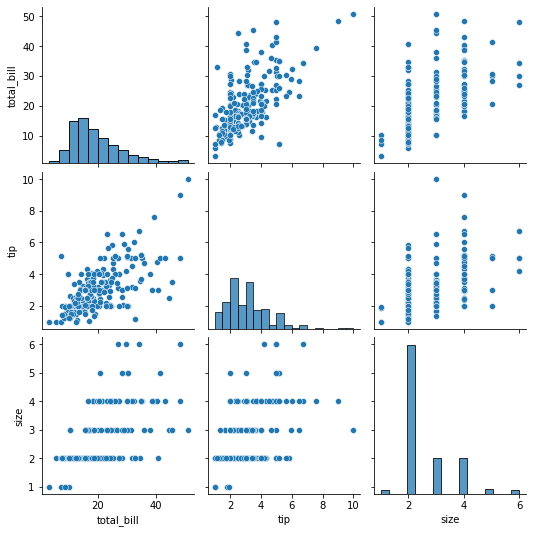

In [53]:
sns.pairplot(tips)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

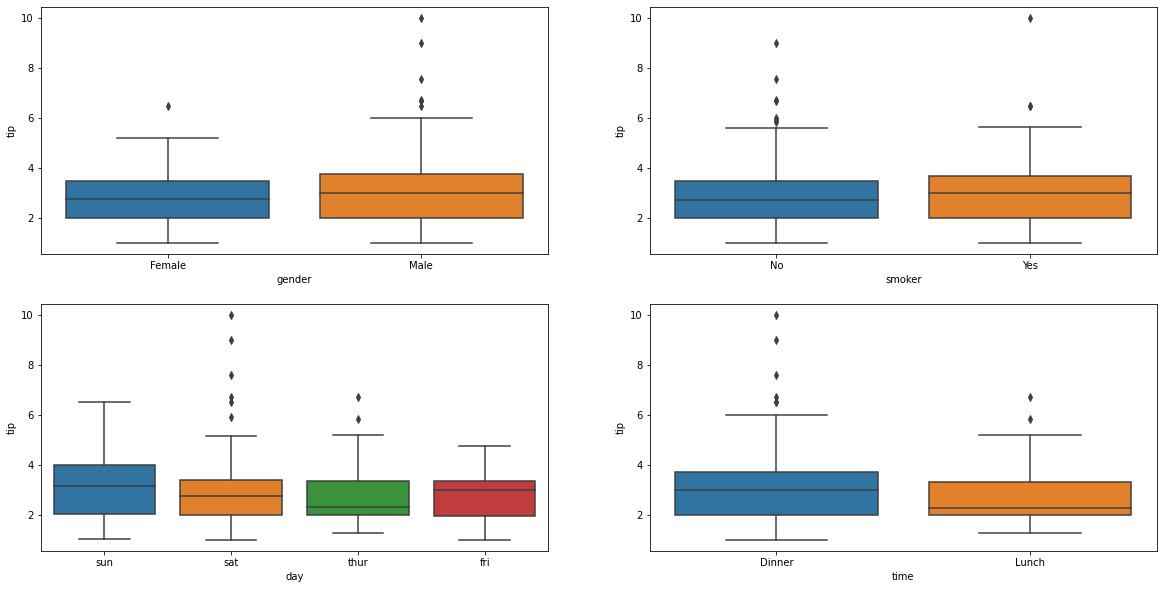

In [54]:
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'gender', y = 'tip', data = tips)
plt.subplot(2,2,2)
sns.boxplot(x = 'smoker', y = 'tip', data = tips)
plt.subplot(2,2,3)
sns.boxplot(x = 'day', y = 'tip', data = tips)
plt.subplot(2,2,4)
sns.boxplot(x = 'time', y = 'tip', data = tips)
plt.show()

## Changing from wide format to long format

In [55]:
data = {'Name': ['John', 'Smith', 'Liz','Tom','Andy'], 
        'City': ['New York', 'Atlanta', 'Chicago','Boston','Atlanta'], 
        'Red': [1, 0, 0,1,0], 
        'Yellow': [0,0,1,0,1],
        'Black':[0,1,0,0,0]}
wide_df = pd.DataFrame(data)
wide_df

,Name,City,Red,Yellow,Black
0,John,New York,1,0,0
1,Smith,Atlanta,0,0,1
2,Liz,Chicago,0,1,0
3,Tom,Boston,1,0,0
4,Andy,Atlanta,0,1,0


In [56]:
help(pd.melt)

Help on function melt in module pandas.core.reshape.melt:

melt(frame: 'DataFrame', id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index: bool = True) -> 'DataFrame'
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it uses
        ``fram

In [57]:
wide_df.head()

,Name,City,Red,Yellow,Black
0,John,New York,1,0,0
1,Smith,Atlanta,0,0,1
2,Liz,Chicago,0,1,0
3,Tom,Boston,1,0,0
4,Andy,Atlanta,0,1,0


In [58]:
# store the value and id variables in two separate arrays

# store the value variables in one Series
value_vars = list(wide_df.columns[2:])

# take the setdiff() to get the rest of the variables
id_vars = list(np.setdiff1d(wide_df.columns, value_vars))

print(value_vars, "\n")
print(id_vars)

['Red', 'Yellow', 'Black'] 

['City', 'Name']


In [59]:
wide_df

,Name,City,Red,Yellow,Black
0,John,New York,1,0,0
1,Smith,Atlanta,0,0,1
2,Liz,Chicago,0,1,0
3,Tom,Boston,1,0,0
4,Andy,Atlanta,0,1,0


In [60]:
# convert into long
long_df = pd.melt(wide_df, 
        id_vars = id_vars, 
        value_vars = value_vars)
long_df

,City,Name,variable,value
0,New York,John,Red,1
1,Atlanta,Smith,Red,0
2,Chicago,Liz,Red,0
3,Boston,Tom,Red,1
4,Atlanta,Andy,Red,0
5,New York,John,Yellow,0
6,Atlanta,Smith,Yellow,0
7,Chicago,Liz,Yellow,1
8,Boston,Tom,Yellow,0
9,Atlanta,Andy,Yellow,1


In [61]:
# remove rows having value=0
long_df = long_df[long_df['value']==1]
long_df = long_df.drop('value', axis=1)

In [62]:
# look at the new df
long_df

,City,Name,variable
0,New York,John,Red
3,Boston,Tom,Red
7,Chicago,Liz,Yellow
9,Atlanta,Andy,Yellow
11,Atlanta,Smith,Black


In [63]:
# renaming the 'variable' column
long_df = long_df.rename(columns={'variable': 'Color of Car'})
long_df

,City,Name,Color of Car
0,New York,John,Red
3,Boston,Tom,Red
7,Chicago,Liz,Yellow
9,Atlanta,Andy,Yellow
11,Atlanta,Smith,Black
